In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Libraries
In this section, we import the necessary libraries for data manipulation (`pandas`) and visualization (`seaborn`, `matplotlib`).


In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv("Zomato Data.csv")

# Display the first few rows of the dataset
print(df.head())

# Get an overview of the dataset (data types, missing values, etc.)
df.info()


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 

# Loading and Inspecting Data
Here, we load the Zomato dataset into a pandas DataFrame and take a quick look at the first few rows and the dataset's info to understand its structure.


In [3]:
# Function to clean and extract the numerator from the 'rate' column (ratings)
def handleRate(value):
    # Split the string by '/' and take the first part (numerator)
    numerator = str(value).split('/')[0]
    return float(numerator)  # Return the numerator as a float

# Apply the function to the 'rate' column
df['rate'] = df['rate'].apply(handleRate)

# Display the updated dataframe
print(df.head())
df.info()


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148

# Handling the 'rate' Column
This section focuses on cleaning the 'rate' column. The ratings are split to extract the numerator (rating value) and convert it into a float for better analysis.


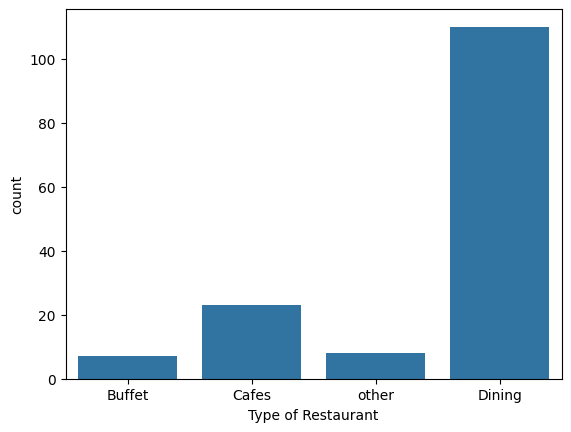

In [4]:
# --- Data Visualization: Count Plot for Type of Restaurant ---
# Visualize the distribution of restaurant types using a count plot
sns.countplot(x=df['listed_in(type)'])

# Label the x-axis for better understanding
plt.xlabel("Type of Restaurant")

# Display the plot
plt.show()

# Data Visualization: Count Plot for Type of Restaurant
This section visualizes the distribution of restaurant types using a count plot to understand how different restaurant types are represented in the dataset.


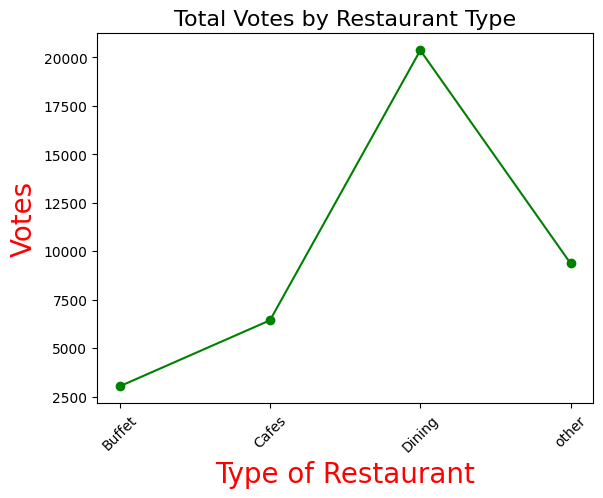

In [5]:
# --- Data Visualization: Line Plot for Total Votes by Restaurant Type ---
# Group the data by restaurant type and sum the number of votes
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

# Convert the grouped data into a DataFrame for easier plotting
result = pd.DataFrame({'votes': grouped_data})

# Create a line plot to visualize the total votes for each restaurant type
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of Restaurant', c='red', size=20)  # X-axis label
plt.ylabel('Votes', c='red', size=20)  # Y-axis label
plt.title("Total Votes by Restaurant Type", fontsize=16)  # Title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Data Visualization: Line Plot for Total Votes by Restaurant Type
In this part, we group the data by restaurant type and visualize the total number of votes for each type using a line plot.


In [6]:
# --- Identify the Restaurant(s) with the Maximum Votes ---
# Find the maximum number of votes
max_votes = df['votes'].max()

# Get the restaurant(s) with the maximum votes
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

# Print the restaurant(s) with the maximum votes
print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes.to_string(index=False))  # Print without index for cleaner output


Restaurant(s) with the maximum votes:
Empire Restaurant


# Identifying Restaurant(s) with Maximum Votes
This section identifies the restaurant(s) with the maximum number of votes and displays their names.


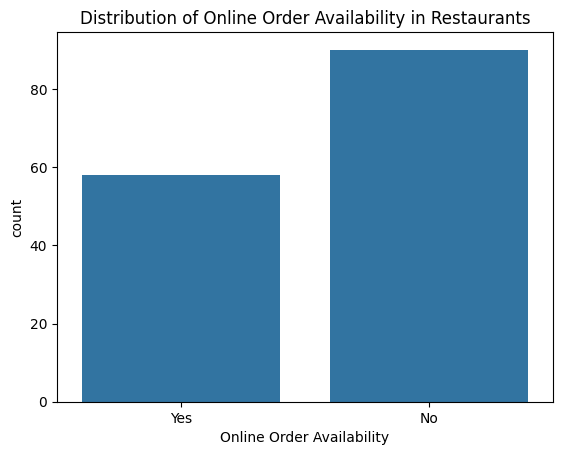

In [7]:
# --- Data Visualization: Count Plot for Online Order Availability ---
# Visualize the distribution of online order availability
sns.countplot(x=df['online_order'])

# Set the x-axis label
plt.xlabel('Online Order Availability')

# Add a title to the plot
plt.title('Distribution of Online Order Availability in Restaurants')

# Display the plot
plt.show()


# Data Visualization: Count Plot for Online Order Availability
This section visualizes the distribution of online order availability in the dataset using a count plot.


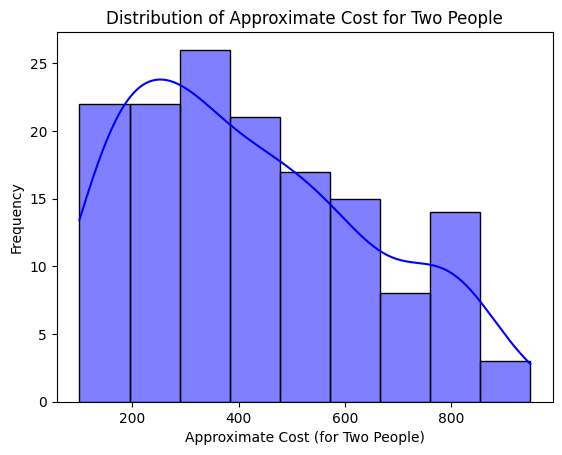

In [8]:
# --- Data Visualization: Histogram for Approximate Cost for Two People ---
# Create a histogram to visualize the distribution of approximate cost for two people
sns.histplot(df['approx_cost(for two people)'], kde=True, color='blue')

# Set the labels for the x-axis and y-axis
plt.xlabel('Approximate Cost (for Two People)')
plt.ylabel('Frequency')

# Add a title to the plot
plt.title('Distribution of Approximate Cost for Two People')

# Show the plot
plt.show()


# Data Visualization: Distribution of Approximate Cost for Two People
Here, we create a histogram to visualize the distribution of the approximate cost for two people at different restaurants.


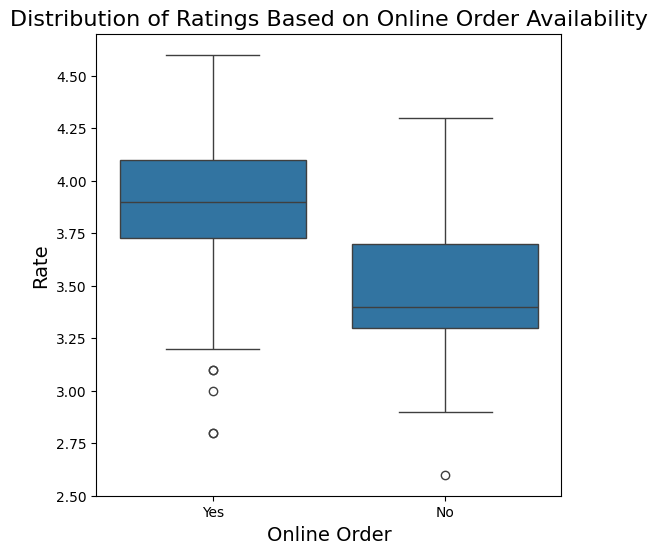

In [9]:
# --- Data Visualization: Box Plot for Ratings Based on Online Order Availability ---
# Create a box plot to visualize the distribution of ratings based on online order availability
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=df)

# Set the labels for the x-axis and y-axis
plt.xlabel('Online Order', size=14)
plt.ylabel('Rate', size=14)

# Add a title to the plot
plt.title('Distribution of Ratings Based on Online Order Availability', size=16)

# Display the plot
plt.show()


# Data Visualization: Box Plot for Ratings Based on Online Order Availability
This section visualizes the distribution of ratings based on whether the restaurant offers online orders using a box plot.


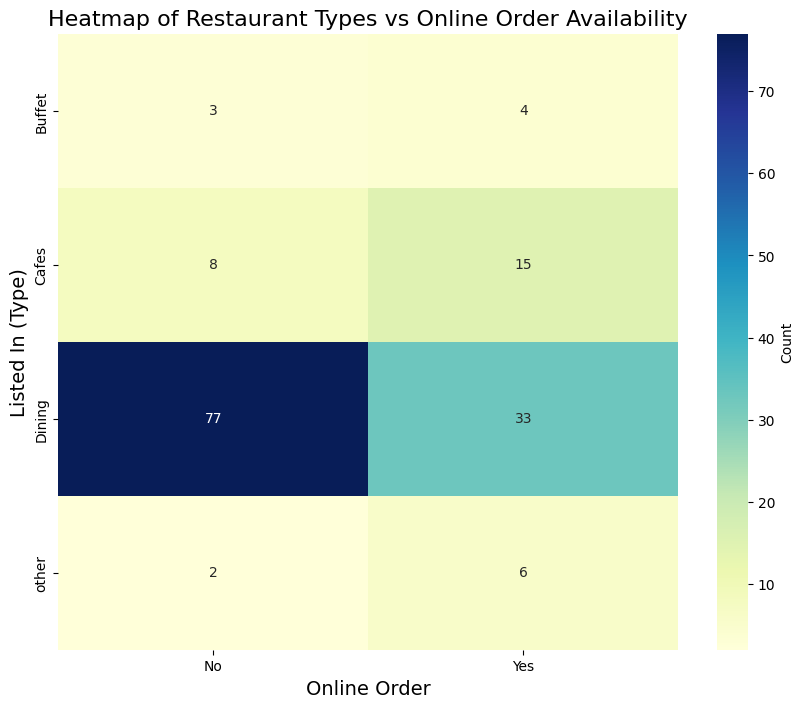

In [10]:
# --- Data Visualization: Heatmap of Restaurant Types vs Online Order Availability ---
# Create a pivot table to count occurrences of restaurant types and online order availability
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Create a heatmap to visualize the relationship between restaurant type and online order availability
plt.figure(figsize=(10, 8))  # Set figure size for better readability
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Count'})

# Add titles and labels to the heatmap
plt.title('Heatmap of Restaurant Types vs Online Order Availability', size=16)
plt.xlabel('Online Order', size=14)
plt.ylabel('Listed In (Type)', size=14)

# Display the plot
plt.show()


# Data Visualization: Heatmap of Restaurant Types vs Online Order Availability
Here, we create a heatmap to visualize the relationship between restaurant type and online order availability.


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


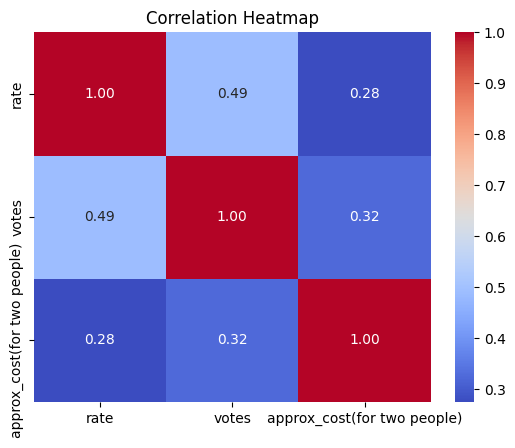

Top 10 Rated Restaurants:
                      name  rate
44                  Onesta   4.6
7                   Onesta   4.6
38       Empire Restaurant   4.4
86           Meghana Foods   4.4
52  Corner House Ice Cream   4.3
37         Szechuan Dragon   4.2
60           Peppy Peppers   4.2
81           Frozen Bottle   4.2
12        The Coffee Shack   4.2
11            Cafe Shuffle   4.2


In [11]:
# --- Check for Missing Data ---
# Check for missing values in the dataset
print(df.isnull().sum())

# --- Correlation Analysis ---
# Correlation heatmap for numerical features
correlation_matrix = df[['rate', 'votes', 'approx_cost(for two people)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# --- Top Restaurants by Rating ---
# Sort restaurants by rating in descending order
top_restaurants_by_rating = df[['name', 'rate']].sort_values(by='rate', ascending=False).head(10)
print("Top 10 Rated Restaurants:")
print(top_restaurants_by_rating)
